In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/employee-salaries-analysis/Employee_Salaries.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/kaggle/input/employee-salaries-analysis/Employee_Salaries.csv')

In [4]:
data.head(10)

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
0,ABS,Alcohol Beverage Services,ABS 85 Administration,M,175873.0000,0.00,0.00,M2
1,ABS,Alcohol Beverage Services,ABS 85 Administration,M,145613.3600,0.00,0.00,M3
2,ABS,Alcohol Beverage Services,ABS 85 Administration,F,136970.0000,0.00,0.00,M3
3,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,89432.6940,0.00,2490.00,21
4,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,78947.0000,456.68,6257.70,16
5,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,98228.0000,518.80,998.28,21
6,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,82405.3864,549.20,0.00,18
7,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,M,93986.0000,1187.06,2452.94,N20
8,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,149464.1500,0.00,9021.82,18
9,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,M,117424.0000,0.00,0.00,N25


In [5]:
data.tail(10)

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
10281,TBS,Department of Technology and Enterprise Busine...,TBS 34 OSP Infrastructure and Cloud Services,M,108776.0000,0.0,0.00,N28
10282,TBS,Department of Technology and Enterprise Busine...,TBS 34 OSP Low Code Governance and Administration,M,134500.0000,0.0,2185.69,N28
10283,TBS,Department of Technology and Enterprise Busine...,TBS 34 OSP Low Code Governance and Administration,F,134500.0000,0.0,2185.69,N28
10284,TBS,Department of Technology and Enterprise Busine...,TBS 34 OSP Low Code Governance and Administration,M,134500.0000,0.0,0.00,N28
10285,TBS,Department of Technology and Enterprise Busine...,TBS 34 OSP Low Code Governance and Administration,M,158802.0000,0.0,0.00,N32
10286,TBS,Department of Technology and Enterprise Busine...,TBS 34 OSP Low Code Governance and Administration,M,134500.0000,0.0,0.00,N28
10287,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Director,F,215032.1000,0.0,0.00,NaN
10288,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Office of Zoning and Administrative Hea...,F,84365.5529,0.0,0.00,N18
10289,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Zoning and Administrative Hearings,F,98228.0000,0.0,1596.27,N21
10290,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Zoning and Administrative Hearings,F,177976.3100,0.0,0.00,N35


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10291 entries, 0 to 10290
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Department       10291 non-null  object 
 1   Department_Name  10291 non-null  object 
 2   Division         10291 non-null  object 
 3   Gender           10291 non-null  object 
 4   Base_Salary      10291 non-null  float64
 5   Overtime_Pay     10291 non-null  float64
 6   Longevity_Pay    10291 non-null  float64
 7   Grade            10258 non-null  object 
dtypes: float64(3), object(5)
memory usage: 643.3+ KB


Data Cleaning

In [7]:
# check missing values

missing_values = data.isnull().sum()

In [8]:
missing_values

Department          0
Department_Name     0
Division            0
Gender              0
Base_Salary         0
Overtime_Pay        0
Longevity_Pay       0
Grade              33
dtype: int64

In [10]:
# check duplicates values

duplicates_rows = data[data.duplicated()]

In [11]:
duplicates_rows

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
17,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,M,117424.0,0.0,0.00,N25
18,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,M,117424.0,0.0,0.00,N25
225,ABS,Alcohol Beverage Services,ABS 85 Goshen Crossing,M,19695.5,0.0,0.00,12
512,CAT,County Attorney's Office,CAT 30 Finance and Procurement,F,78947.0,0.0,3357.62,N16
517,CAT,County Attorney's Office,CAT 30 Finance and Procurement,F,158802.0,0.0,0.00,N32
...,...,...,...,...,...,...,...,...
10246,TBS,Department of Technology and Enterprise Busine...,TBS 34 ODT Technical Support Team,M,134500.0,0.0,0.00,N28
10248,TBS,Department of Technology and Enterprise Busine...,TBS 34 ODT Web Solutions Team,F,134500.0,0.0,5747.80,N28
10266,TBS,Department of Technology and Enterprise Busine...,TBS 34 OSP Employee Productivity Services,F,134500.0,0.0,2185.69,N28
10271,TBS,Department of Technology and Enterprise Busine...,TBS 34 OSP Employee Productivity Services,M,134500.0,0.0,0.00,N28


In [12]:
# Remove NaN Values

data_cleaned = data.dropna()

In [13]:
data_cleaned

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
0,ABS,Alcohol Beverage Services,ABS 85 Administration,M,175873.0000,0.00,0.00,M2
1,ABS,Alcohol Beverage Services,ABS 85 Administration,M,145613.3600,0.00,0.00,M3
2,ABS,Alcohol Beverage Services,ABS 85 Administration,F,136970.0000,0.00,0.00,M3
3,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,89432.6940,0.00,2490.00,21
4,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,78947.0000,456.68,6257.70,16
...,...,...,...,...,...,...,...,...
10285,TBS,Department of Technology and Enterprise Busine...,TBS 34 OSP Low Code Governance and Administration,M,158802.0000,0.00,0.00,N32
10286,TBS,Department of Technology and Enterprise Busine...,TBS 34 OSP Low Code Governance and Administration,M,134500.0000,0.00,0.00,N28
10288,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Office of Zoning and Administrative Hea...,F,84365.5529,0.00,0.00,N18
10289,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Zoning and Administrative Hearings,F,98228.0000,0.00,1596.27,N21


In [15]:
# Remove Duplicates

data_cleaned.drop_duplicates(inplace=True)

/tmp/ipykernel_33/928330799.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.drop_duplicates(inplace=True)


In [16]:
data_cleaned

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
0,ABS,Alcohol Beverage Services,ABS 85 Administration,M,175873.0000,0.00,0.00,M2
1,ABS,Alcohol Beverage Services,ABS 85 Administration,M,145613.3600,0.00,0.00,M3
2,ABS,Alcohol Beverage Services,ABS 85 Administration,F,136970.0000,0.00,0.00,M3
3,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,89432.6940,0.00,2490.00,21
4,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,78947.0000,456.68,6257.70,16
...,...,...,...,...,...,...,...,...
10284,TBS,Department of Technology and Enterprise Busine...,TBS 34 OSP Low Code Governance and Administration,M,134500.0000,0.00,0.00,N28
10285,TBS,Department of Technology and Enterprise Busine...,TBS 34 OSP Low Code Governance and Administration,M,158802.0000,0.00,0.00,N32
10288,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Office of Zoning and Administrative Hea...,F,84365.5529,0.00,0.00,N18
10289,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Zoning and Administrative Hearings,F,98228.0000,0.00,1596.27,N21


In [17]:
employee = data_cleaned

In [18]:
employee.shape

(9649, 8)

Summary Statistics

In [19]:
employee.describe()

,Base_Salary,Overtime_Pay,Longevity_Pay
count,9649.000000,9649.000000,9649.000000
mean,90530.121059,8616.459808,1577.012563
std,30463.741275,16895.363879,3259.647168
min,18257.500000,0.000000,0.000000
25%,71080.560100,0.000000,0.000000
50%,87328.000000,526.710000,0.000000
75%,107934.000000,10275.500000,1352.530000
max,292000.000000,227428.990000,20279.460000


In [20]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9649 entries, 0 to 10290
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Department       9649 non-null   object 
 1   Department_Name  9649 non-null   object 
 2   Division         9649 non-null   object 
 3   Gender           9649 non-null   object 
 4   Base_Salary      9649 non-null   float64
 5   Overtime_Pay     9649 non-null   float64
 6   Longevity_Pay    9649 non-null   float64
 7   Grade            9649 non-null   object 
dtypes: float64(3), object(5)
memory usage: 678.4+ KB


In [21]:
employee.columns

Index(['Department', 'Department_Name', 'Division', 'Gender', 'Base_Salary',
       'Overtime_Pay', 'Longevity_Pay', 'Grade'],
      dtype='object')

In [22]:
employee['Gender'].value_counts()

Gender
M    5674
F    3975
Name: count, dtype: int64

In [23]:
employee['Base_Salary'].value_counts()

Base_Salary
108084.0000    372
117424.0000    194
107367.0000    191
98228.0000     190
78947.0000     186
              ... 
142506.5700      1
108258.7966      1
84760.0316       1
91222.2855       1
177976.3100      1
Name: count, Length: 3451, dtype: int64

In [24]:
employee['Overtime_Pay'].value_counts()

Overtime_Pay
0.00        4040
22.60          5
45.20          4
116.28         3
50.08          3
            ... 
17961.88       1
15430.05       1
13738.50       1
20165.97       1
2591.66        1
Name: count, Length: 5566, dtype: int64

In [25]:
employee['Longevity_Pay'].value_counts()

Longevity_Pay
0.00        6926
11524.76     170
13310.70      68
6257.70       42
3732.58       42
            ... 
624.26         1
8279.28        1
7987.32        1
10754.04       1
3594.90        1
Name: count, Length: 1112, dtype: int64

Data Visualization 

In [26]:
employee.columns

Index(['Department', 'Department_Name', 'Division', 'Gender', 'Base_Salary',
       'Overtime_Pay', 'Longevity_Pay', 'Grade'],
      dtype='object')

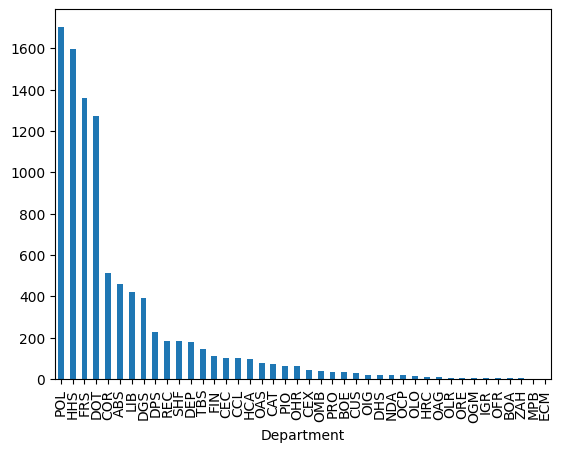

In [27]:
# Visualize All Columns

employee['Department'].value_counts().plot(kind='bar')
plt.show()

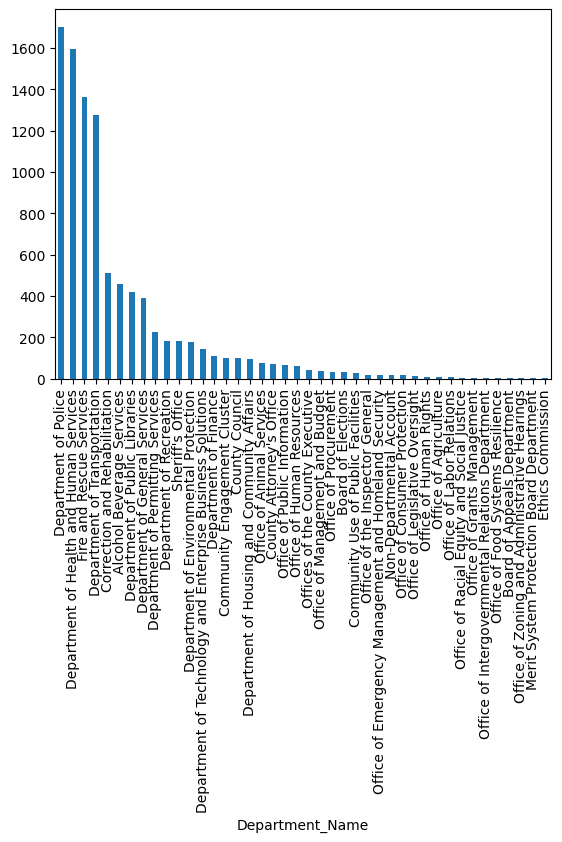

In [28]:
# Visualize All Columns

employee['Department_Name'].value_counts().plot(kind='bar')
plt.show()

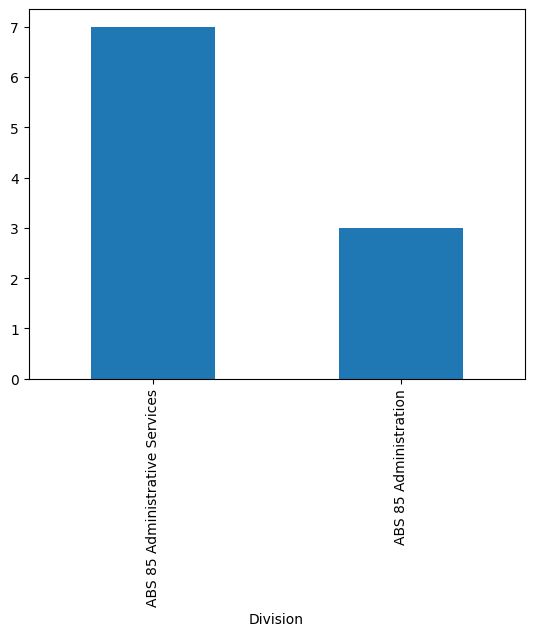

In [30]:
# Visualize All Columns

employee['Division'].head(10).value_counts().plot(kind='bar')
plt.show()

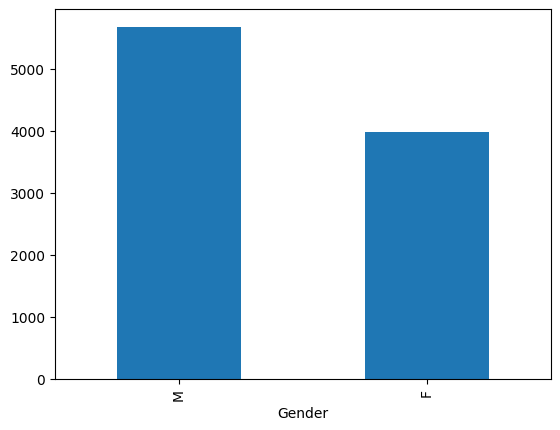

In [31]:
# Visualize All Columns

employee['Gender'].value_counts().plot(kind='bar')
plt.show()

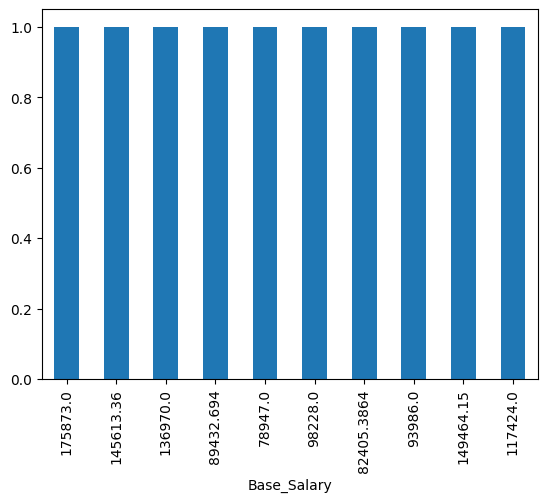

In [33]:
# Visualize All Columns

employee['Base_Salary'].head(10).value_counts().plot(kind='bar')
plt.show()

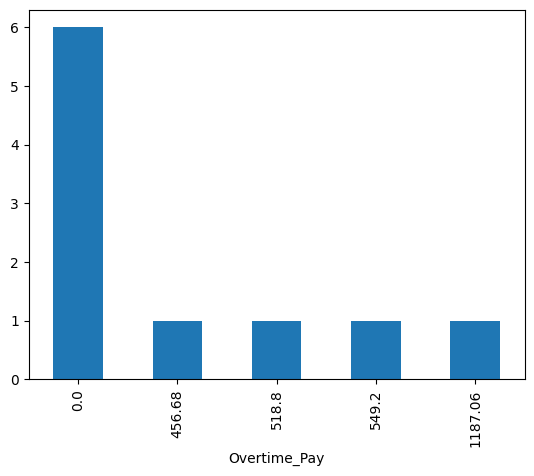

In [35]:
# Visualize All Columns

employee['Overtime_Pay'].head(10).value_counts().plot(kind='bar')
plt.show()

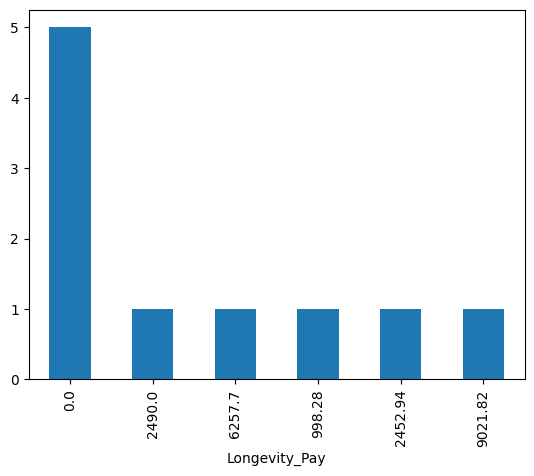

In [36]:
# Visualize All Columns

employee['Longevity_Pay'].head(10).value_counts().plot(kind='bar')
plt.show()

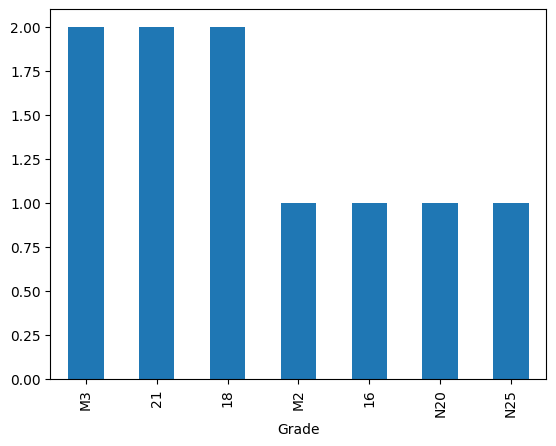

In [38]:
# Visualize All Columns

employee['Grade'].head(10).value_counts().plot(kind='bar')
plt.show()

# Followed This Instructions : 

* Gender Pay Gap Analysis: An examination of salary differences between genders within similar roles, grades, and departments to identify any disparities that need to be addressed.

* Departmental Salary Analysis: Analyzing the distribution of salaries across different departments and divisions to understand how compensation varies within the organization.

* Impact of Overtime and Longevity Pay: Evaluating how overtime and longevity pay contribute to the overall compensation of employees and identifying trends or patterns in these payments.

In [40]:
employee.columns

Index(['Department', 'Department_Name', 'Division', 'Gender', 'Base_Salary',
       'Overtime_Pay', 'Longevity_Pay', 'Grade'],
      dtype='object')

In [51]:
# Gender Pay Gap Analysis

gender_pay_gap = data.groupby('Gender')['Base_Salary'].mean()

In [58]:
# Departmental Salary Analysis

average_salaries = department_salary[('Base_Salary', 'mean')]

In [43]:
# Impact of Overtime and Longevity Pay

employee['Total_Compensation'] = employee['Base_Salary'] + employee['Overtime_Pay'] + employee['Longevity_Pay']

/tmp/ipykernel_33/4102096613.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employee['Total_Compensation'] = employee['Base_Salary'] + employee['Overtime_Pay'] + employee['Longevity_Pay']


# Create histograms Gender Pay Gap Analysis

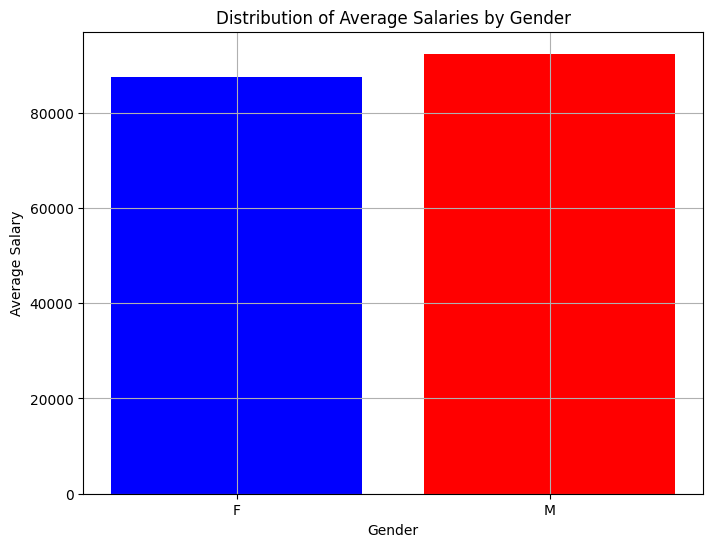

In [55]:
plt.figure(figsize=(8, 6))
plt.bar(gender_pay_gap.index, gender_pay_gap.values, color=['blue', 'red'])
plt.title('Distribution of Average Salaries by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Salary')
plt.grid(True)
plt.show()

#  Histograms for the Departmental Salary Analysis

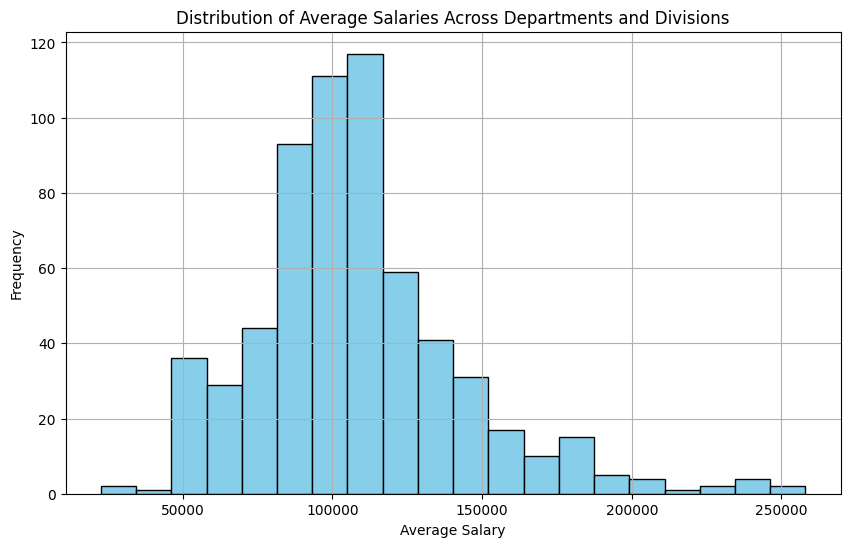

In [59]:
plt.figure(figsize=(10, 6))
plt.hist(average_salaries, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Average Salaries Across Departments and Divisions')
plt.xlabel('Average Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Histogram showing the impact of overtime and longevity pay on total compensation

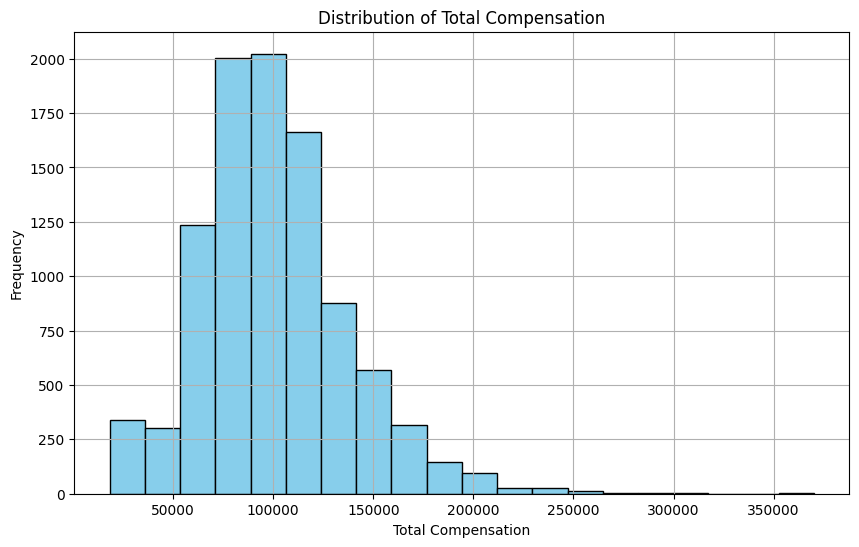

In [60]:
plt.figure(figsize=(10, 6))
plt.hist(employee['Total_Compensation'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Compensation')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()